In [2]:
!pip install scikit-surprise
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, NMF, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate, GridSearchCV
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163341 sha256=7e1d1b53e0fb1012d0c2d26ba3b1cea2b7eace348385ef3a8625d6b38f591eed
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Розробити за допомогою бібліотеки surprise рекомендаційну систему.
Використати датасет   movielens-100k  

In [5]:
data = Dataset.load_builtin('ml-100k')

Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір.

In [6]:
algorithms = {
    'SVD': SVD,
    'SVDpp': SVDpp,
    'NMF': NMF,
    'KNNBasic': KNNBasic,
    'KNNWithMeans': KNNWithMeans
}

results = {}

Обчисліть середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації.

RMSE вказує на середню помилку у передбаченнях алгоритму.

Зазвичай, алгоритм з найменшим значенням RMSE вважається найкращим для даного завдання рекомендації.

In [10]:
for name, algo in algorithms.items():
    cv_results = cross_validate(algo(), data, measures=['RMSE'], cv=5, verbose=True)
    results[name] = cv_results['test_rmse'].mean()

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9414  0.9308  0.9412  0.9386  0.9388  0.9382  0.0038  
Fit time          1.49    1.36    1.34    1.32    1.83    1.47    0.19    
Test time         0.23    0.15    0.14    0.21    0.21    0.19    0.04    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9286  0.9129  0.9167  0.9174  0.9162  0.9184  0.0053  
Fit time          27.50   26.74   26.32   26.64   26.47   26.73   0.41    
Test time         4.39    5.66    4.07    5.20    4.12    4.69    0.63    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9688  0.9553  0.9613  0.9611  0.9711  0.9635  0.0057  
Fit time          2.00    2.46    2.22    2.00    2.02    2.14    0.18    
Test time         0.16    

Виберіть оптимальний алгоритм. Зробіть візуалізацію.

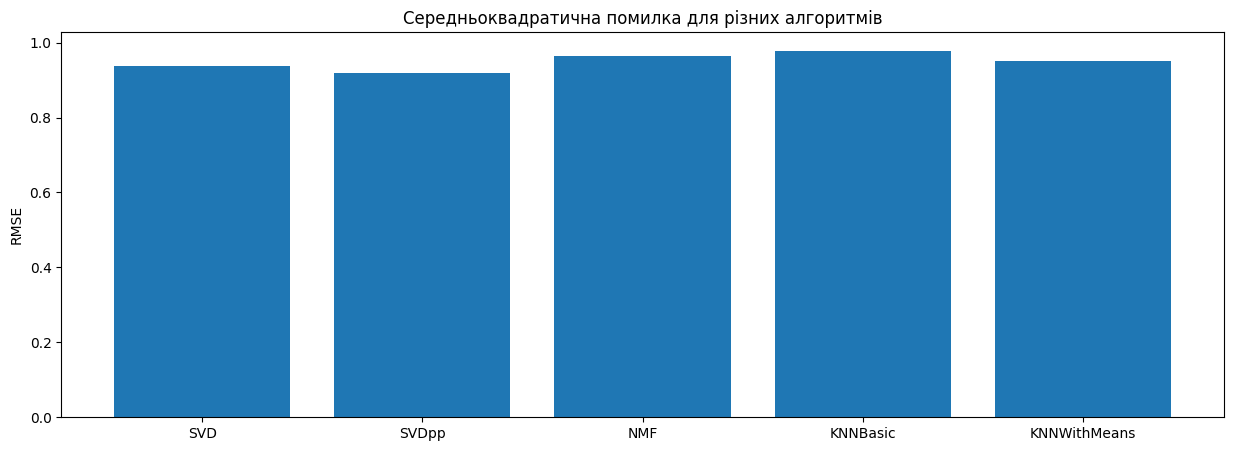

In [11]:
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(15, 5))
plt.bar(names, values)
plt.ylabel('RMSE')
plt.title('Середньоквадратична помилка для різних алгоритмів')
plt.show()

In [13]:
best = min(results, key=results.get)
print(f'Оптимальний алгоритм: {best} з RMSE = {results[best]}')

Оптимальний алгоритм: SVDpp з RMSE = 0.9183545062225733


Висновок:
**SVD:**
Середнє значення RMSE: 0.9382
Середній час підгонки: 1.47 секунди
Середній час тестування: 0.19 секунди
**SVDpp:**
Середнє значення RMSE: 0.9184
Середній час підгонки: 26.73 секунди
Середній час тестування: 4.69 секунди
**NMF:**
Середнє значення RMSE: 0.9635
Середній час підгонки: 2.14 секунди
Середній час тестування: 0.17 секунди
**KNNBasic:**
Середнє значення RMSE: 0.9787
Середній час підгонки: 0.36 секунди
Середній час тестування: 3.43 секунди
**KNNWithMeans:**
Середнє значення RMSE: 0.9497
Середній час підгонки: 0.38 секунди
Середній час тестування: 3.41 секунди
З урахуванням наведених результатів, алгоритм SVDpp демонструє найкращий результат за показником RMSE (0.9184), що робить його оптимальним для цього датасету. Втім, він також має найвищий час підгонки та тестування порівняно з іншими алгоритмами. Це може вказувати на більш складний обчислювальний процес цього алгоритму.
Якщо швидкість є важливою, то алгоритм SVD може бути гарною альтернативою, оскільки його RMSE лише трохи вищий (0.9382), але час підгонки та тестування набагато менший.